# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчет-центральной-зоны-в-Санкт-Петербурге:" data-toc-modified-id="Расчет-центральной-зоны-в-Санкт-Петербурге:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Расчет центральной зоны в Санкт-Петербурге:</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта

Получена задача проанализировать рынок недвижимости в Санкт-Петербурге в период с 2014 по 2019 гг.
В предоставленном датафрейме есть данные, внесенные как пользователями так и внесенные автоматически из системы картографических данных.

Задачи проекта: 

*  Познакомиться с данными и сделать первые выводы с чем предстоит работать;
*  Провести предобработку данных;
*  Расчитать и добавить недостающие данные;
*  Провести исследовательский анализ с помощью графиков и ответить на поставленные вопросы.

Цель проекта - установка параметров, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

## Изучение данных из файла

Сначала ознакомимся с данными, импортируем библиотеки, открываем файл, изучаем содержание таблицы. 

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
import warnings
warnings.filterwarnings("ignore")   

In [70]:
pd.set_option('float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)

In [71]:
data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

In [72]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [73]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В названиях столбцов нарушения стиля нет, змеиный регистр соблюден.

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [75]:
# Определяем процент пропусков по каждому столбцу
data.isna().sum() / data.shape[0] * 100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height         38.80
floors_total            0.36
living_area             8.03
floor                   0.00
is_apartment           88.29
studio                  0.00
open_plan               0.00
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
cityCenters_nearest    23.29
parks_around3000       23.28
parks_nearest          65.91
ponds_around3000       23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

В данных имеются пропуски, в дальнейшем их обработаем. 

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,"23,699.00",9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,"23,699.00","6,541,548.77","10,887,013.27","12,190.00","3,400,000.00","4,650,000.00","6,800,000.00","763,000,000.00"
total_area,"23,699.00",60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,"23,699.00",2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,"14,504.00",2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,"23,613.00",10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,"21,796.00",34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,"23,699.00",5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,"21,421.00",10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,"12,180.00",1.15,1.07,0.00,0.00,1.00,2.00,5.00


**Описание данных**

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

* `balcony` — число балконов

* `ceiling_height` — высота потолков (м)

* `cityCenters_nearest` — расстояние до центра города (м)

* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

* `first_day_exposition` — дата публикации

* `floor` — этаж

* `floors_total` — всего этажей в доме

* `is_apartment` — апартаменты (булев тип)

* `kitchen_area` — площадь кухни в квадратных метрах (м²)

* `last_price` — цена на момент снятия с публикации

* `living_area` — жилая площадь в квадратных метрах (м²)

* `locality_name` — название населённого пункта

* `open_plan` — свободная планировка (булев тип)

* `parks_around3000` — число парков в радиусе 3 км

* `parks_nearest` — расстояние до ближайшего парка (м)

* `ponds_around3000` — число водоёмов в радиусе 3 км

* `ponds_nearest` — расстояние до ближайшего водоёма (м)

* `rooms` — число комнат

* `studio` — квартира-студия (булев тип)

* `total_area` — площадь квартиры в квадратных метрах (м²)

* `total_images` — число фотографий квартиры в объявлении

### Вывод

Мы изучили данные, в таблице имеются пропуски, которые в дальнейшем будут обработаны. Так же в дальнейшем изменим некоторые типы данных. 

Предварительно можно утверждать, что данных достаточно для достижения цели исследования (установить параметры, влияющие на стоимость недвижимости). 

## Предобработка данных

**Заполняем пропуски в данных**


Пропуски в `['ceiling_height']` (высота потолков) составляют около 39%. Эти данные важны для исследования, так что заменим пропуски на медианное значение. В целом, высота потолков не сильно отличается в подавляющем большинстве квартир, поэтому медианное значение подойдет для замены. 

Причиной возникновения таких пропусков может быть то, что пользователи не сочли важным указывать этот параметр, т.к. считают его стандартным.

In [77]:
median_ceil = data['ceiling_height'].median()
print(median_ceil)
data['ceiling_height'].fillna(median_ceil, inplace=True)
data['ceiling_height'].value_counts()

2.65


2.65    9871
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
5.00       1
2.20       1
4.15       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

Посмотрим на квартиры с пропусками в жилой площади и площади кухни.

In [78]:
data[data['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.65,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,2.65,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
30,12,"2,200,000.00",32.80,2018-02-19T00:00:00,1,2.65,9.00,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00
37,10,"1,990,000.00",45.80,2017-10-28T00:00:00,2,2.50,5.00,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.00
44,13,"5,350,000.00",40.00,2018-11-18T00:00:00,1,2.65,22.00,NaN,3,NaN,False,False,NaN,1.00,Санкт-Петербург,"30,471.00","11,603.00",1.00,620.00,1.00,"1,152.00",NaN


In [79]:
data[data['kitchen_area'].isna()].tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23655,1,"2,414,306.00",40.50,2016-09-08T00:00:00,1,2.56,18.00,19.60,10,False,False,False,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.00
23663,12,"6,400,000.00",88.00,2018-01-12T00:00:00,4,2.55,10.00,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,"33,642.00","13,943.00",0.00,NaN,2.00,844.00,59.00
23670,9,"2,450,000.00",45.60,2018-02-08T00:00:00,1,2.80,9.00,NaN,2,NaN,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23679,0,"2,500,000.00",35.00,2017-12-08T00:00:00,1,2.65,9.00,NaN,4,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,2.65,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски не связаны с тем, что это квартиры-студии или  квартиры свободной планировки, возможно, пользователи не захотели указывать эти параметры или не имели возможности их измерить.

Оценим соотношение жилой площади и площади кухни к общей, чтобы проверить есть ли квартиры, в которых жилая/кухонная площадь больше общей.

In [80]:
# Отношение площади кухни к общей площади
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']
data['kitchen_ratio'].describe()

count   21,421.00
mean         0.19
std          0.07
min          0.03
25%          0.13
50%          0.17
75%          0.23
max          0.79
Name: kitchen_ratio, dtype: float64

Максимальное отношение площади кухни к общей - 0,79, данные корректны, пропуски можем заменить медианой. 

In [81]:
# Отношение жилой площади к общей
data['living_ratio'] = data['living_area'] / data['total_area']
data['living_ratio'].describe()

count   21,796.00
mean         0.56
std          0.11
min          0.02
25%          0.50
50%          0.57
75%          0.64
max          1.00
Name: living_ratio, dtype: float64

Здесь мы видим, что есть квартиры, где общая и жилая площадь равны. Пропуски в жилой площади заменим исходя из типичного соотношения жилой и общей площади.

In [82]:
data['living_area'].fillna(data['total_area'] * 0.6, inplace=True)
data['living_area'].isna().sum()

0

In [83]:
data['living_area'].value_counts()

18.00     897
17.00     675
30.00     614
16.00     486
20.00     481
         ... 
15.96       1
92.60       1
151.00      1
43.15       1
48.18       1
Name: living_area, Length: 2258, dtype: int64

In [84]:
median_kitchen_area = data['kitchen_area'].median()
print(median_kitchen_area)
data['kitchen_area'].fillna(median_kitchen_area, inplace=True)
data['kitchen_area'].value_counts()

9.1


9.10     2360
6.00     1300
10.00    1262
8.00     1110
9.00     1101
         ... 
53.10       1
12.56       1
11.84       1
13.27       1
13.83       1
Name: kitchen_area, Length: 971, dtype: int64

Удалим строки с пропусками в `['floors_total']` (всего этажей в домах), их количество меньше 0,4%. Аналогично поступим с пропусками в `['locality_name']` (название населенного пункта), таких значений 0,2%. 

In [85]:
data.dropna(subset=['floors_total','locality_name'], inplace=True)
data['floors_total'].isna().sum()

0

In [86]:
data['locality_name'].isna().sum()

0

Пропуски в `['is_apartment']` заменим на False, если не указано, что недвижимость является апартаментами, скорее всего она не является. 

In [87]:
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].value_counts()

False    23515
True        50
Name: is_apartment, dtype: int64

Пропуски в `['balcony']` (число балконов) заменим на `0`, скорее всего, если не указано количество балконов, значит, они отстутсвуют.

In [88]:
data['balcony'].fillna(0, inplace=True)
data['balcony'].value_counts()

0.00    15155
1.00     4187
2.00     3656
5.00      304
4.00      182
3.00       81
Name: balcony, dtype: int64

In [89]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_ratio,living_ratio
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,False,False,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,0.23,0.47
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,2.65,11.00,18.60,1,False,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,0.27,0.46
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.65,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,0.15,0.61
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.65,14.00,95.40,9,False,False,False,9.10,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,NaN,NaN
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,False,False,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,0.41,0.32


Оценим количество пропусков.

In [90]:
data.isna().sum() / data.shape[0] * 100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height          0.00
floors_total            0.00
living_area             0.00
floor                   0.00
is_apartment            0.00
studio                  0.00
open_plan               0.00
kitchen_area            0.00
balcony                 0.00
locality_name           0.00
airports_nearest       23.44
cityCenters_nearest    23.34
parks_around3000       23.34
parks_nearest          65.92
ponds_around3000       23.34
ponds_nearest          61.65
days_exposition        13.46
kitchen_ratio           9.43
living_ratio            7.91
dtype: float64

Мы отредактировали пропуски в данных, полученных от пользователей. Заменить пропуски в геоданных не представляется возможным, оставим их без изменений.

Пропуски в `['days_exposition']` возможно связаны с тем, что квартиры еще не проданы. Пропуски там оставим без изменений.

In [91]:
data[data['days_exposition'].isnull()].pivot_table(columns = 'first_day_exposition', values = 'total_area', aggfunc = 'count').T

,total_area
first_day_exposition,
2014-11-27T00:00:00,3
2014-12-08T00:00:00,1
2014-12-09T00:00:00,7
2014-12-10T00:00:00,3
2014-12-11T00:00:00,2
...,...
2019-04-29T00:00:00,36
2019-04-30T00:00:00,25
2019-05-01T00:00:00,29


Заменим тип данных в колонке `['first_day_exposition']` методом `to_datetime()` для удобства работы со временем.

In [92]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Количество балконов и этажей приведем к целым числам.

In [93]:
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

Столбец `['is_apartment']` приведем к булеву типу. 

In [94]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [96]:
data.duplicated().sum()

0

Типы данных отредактированы, пропуски удалены, дубликатов нет, данные пригодны для дальнейшей работы.

### Вывод

Мы опеределили пропущенные значения.

Пропуски в высоте потолков, жилой площади и площади кухни заменили медианными значениями.

Удалили строки с пропусками в названии населенного пункта и числе этажей здания (их значения были незначительными). 

Пропуски в геоданных оставили без изменений, т.к. нет возможности их изменить корректно и для исследования эти данные не используются. 

Отредактированы типы данных в столбцах для удобства в работе и визуальном оформлении. 


## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [97]:
data['metre_price'] = data['last_price'] / data['total_area']

In [98]:
data['week_day_expo'] = data['first_day_exposition'].dt.weekday

In [99]:
data['month_expo'] = data['first_day_exposition'].dt.month

In [100]:
data['year_expo'] = data['first_day_exposition'].dt.year

In [101]:
#Добавим функцию для категоризации этажа
def floor_type(df):
    """Функция проверяет этаж, на котором находится квартира, 
     возвращает значение: первый, последний или другой"""
    
    if  df['floor'] == 1:
        return 'первый'
    if df['floor'] == df['floors_total']:
        return 'последний'
    return 'другой'

#проверка функции, подставим разные значения этажей в row_values
row_values = [5, 5] #этаж 5, всего этажей 5
row_columns = ['floor', 'floors_total']
row = pd.Series(data=row_values, index=row_columns) 
floor_type(row) 

'последний'

In [102]:
# Теперь создадим новый столбец, применяя  функцию floor_type
data['flat_floor'] = data.apply(floor_type, axis=1)

In [103]:
# Отношение жилой площади к общей
data['living_ratio'] = data['living_area'] / data['total_area']

In [104]:
# Отношение площади кухни к общей площади
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']

In [105]:
data['kitchen_ratio'].describe()

count   23,565.00
mean         0.19
std          0.08
min          0.02
25%          0.13
50%          0.17
75%          0.23
max          0.79
Name: kitchen_ratio, dtype: float64

In [106]:
data['living_ratio'].describe()

count   23,565.00
mean         0.57
std          0.10
min          0.02
25%          0.50
50%          0.58
75%          0.63
max          1.00
Name: living_ratio, dtype: float64

In [66]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_ratio,living_ratio,metre_price,week_day_expo,month_expo,year_expo,flat_floor
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,0.23,0.47,"120,370.37",3,3,2019,другой
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,0.27,0.46,"82,920.79",1,12,2018,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,0.15,0.61,"92,785.71",3,8,2015,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,95.40,9,False,False,False,9.10,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,0.06,0.60,"408,176.10",4,7,2015,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,0.41,0.32,"100,000.00",1,6,2018,другой


### Вывод

Мы провели необходимые для дальнейшей работы расчеты и добавили их в таблицу. Теперь можно приступить исследовательскому анализу данных и визуализации результатов. 

## Исследовательский анализ данных

Проведем исследовательский анализ данных и выполним инструкции:

* Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
* Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
* Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `['locality_name']`.
* Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
* Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

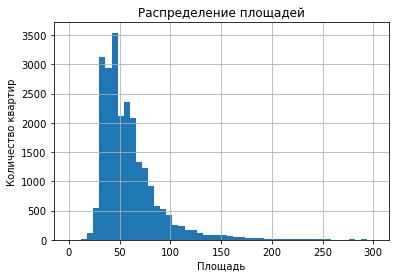

In [115]:
_ = data['total_area'].hist(bins=50, range=(0, 300))
_.set_title('Распределение площадей')
_.set_xlabel('Площадь')
_.set_ylabel('Количество квартир');

Распределение площадей показывает, что наиболее часто встречаются квартиры с площадью 30-50 кв.м.

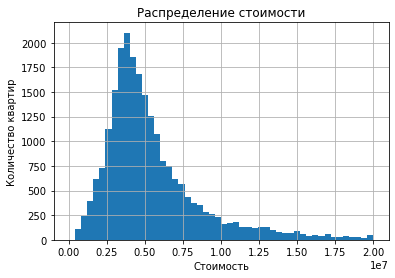

In [119]:
_ = data['last_price'].hist(bins=50, range=(0, 20_000_000))
_.set_title('Распределение стоимости')
_.set_xlabel('Стоимость')
_.set_ylabel('Количество квартир');

Самая распространенная стоимость недвижимости 3 - 5 млн. руб. Имеются и дорогие объекты недвижимости, стоимостю свыше 20 млн., но их количество значительно меньше.

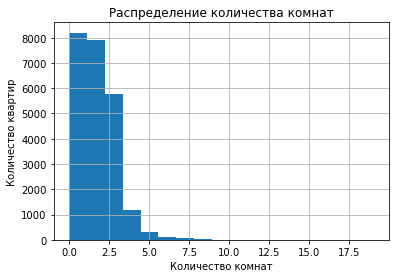

In [120]:
_ = data['rooms'].hist(bins=17)
_.set_title('Распределение количества комнат')
_.set_xlabel('Количество комнат')
_.set_ylabel('Количество квартир');

Наиболее распространены квартиры с 1 и 2 комнатами, менее распространены 3х комнатные квартиры. Количество квартиры с большим числом комнат незначительное. 

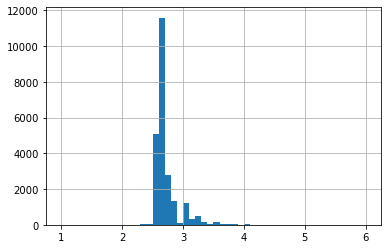

In [121]:
data['ceiling_height'].hist(bins=50, range=(1, 6))
_.set_title('Распределение высоты потолков')
_.set_xlabel('Высота потолков, м')
_.set_ylabel('Количество квартир');

Самая распространенная высота потолков 2.65м (учитываем, что 40% пропусков были заменены на медиану). Есть недвижимость с потолками более 3м, но этих предложений значительно меньше. 

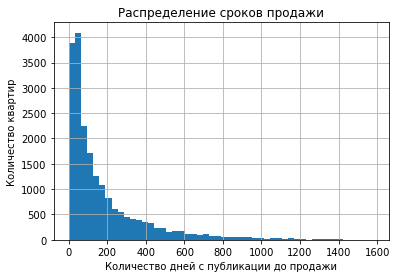

In [123]:
_ = data['days_exposition'].hist(bins=50)
_.set_title('Распределение сроков продажи')
_.set_xlabel('Количество дней с публикации до продажи')
_.set_ylabel('Количество квартир');

Судя по гистограмме, чаще всего квартиры продаются в первый 100 дней после публикации объявления. Есть и значения, превышающие 1400 дней (менее 4 лет). 

Проведем более подробный анализ времени продажи квартир.

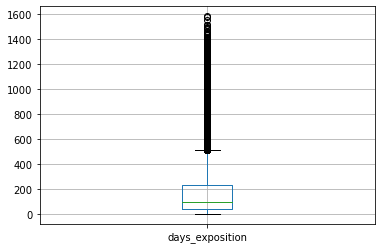

In [124]:
# Посмотрим на диаграмме размаха по времени продажи
data.boxplot(column='days_exposition');

In [125]:
data['days_exposition'].describe() 

count   20,394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

Среднее значение по длительности продажи - 180 дней, медиана - 95 дней. 
Обычно продажа занимает около 3 месяцев (95 дней - медианное значение). Можно считать, что продажи прошли очень быстро, если они прошли быстрее, чем за 45 дней. Необычно долгими можно считать продажи свыше 231 дня. 

#### Промежуточный вывод

Наиболее типичная квартира в нашем датасете: однокомнатная квартира около 40 м^2 стоимостью около 4 млн. руб. с высотой потолков около 2,65 м, которая продается за 95 дней.

Уберем редкие и выбивающиеся значения.

Уберем выбросы в стоимости продажи квартир. 

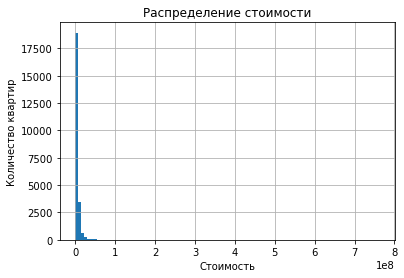

In [126]:
_ = data['last_price'].hist(bins=100)
_.set_title('Распределение стоимости')
_.set_xlabel('Стоимость')
_.set_ylabel('Количество квартир');

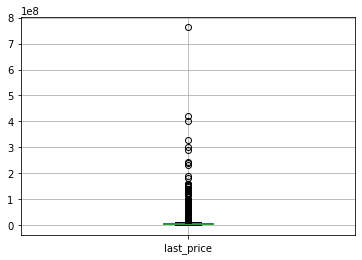

In [127]:
data.boxplot(column='last_price');

Здесь очень большой разброс цен, по диаграмме размаха визуально сложно сделать вывод, поэтому расчитаем межквартильный размах с помощью формул.

In [128]:
data['last_price'].describe() 

count        23,565.00
mean      6,540,058.26
std      10,910,934.72
min          12,190.00
25%       3,400,000.00
50%       4,646,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64

Медианное значение 4.6 млн, а максимальное - 763 млн. 

In [129]:
q1 = data['last_price'].quantile(0.25)
q3 = data['last_price'].quantile(0.75)
q =  q3 + (q3 - q1)*1.5
print(q)

11875000.0


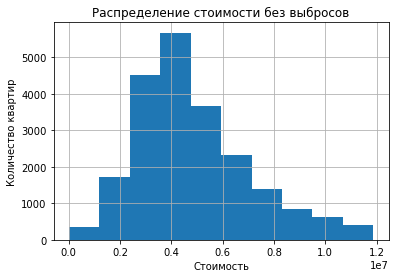

In [132]:
data_filtered = data.query('last_price <= @q')
_ = data_filtered['last_price'].hist(); 
_.set_title('Распределение стоимости без выбросов')
_.set_xlabel('Стоимость')
_.set_ylabel('Количество квартир');

После удаления выбросов стало гораздо нагляднее, что наиболее часто продаются квартиры стоимостью от 2.5 до 6 млн. 

Точно так же удалим выбросы и по стоимости квадратного метра.

In [790]:
data_filtered.shape

(21125, 29)

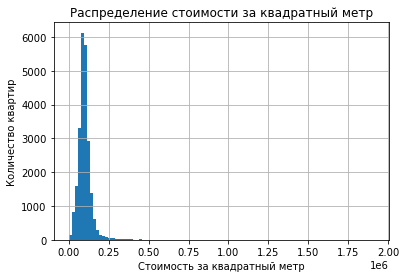

In [133]:
_ = data['metre_price'].hist(bins=100)
_.set_title('Распределение стоимости за квадратный метр')
_.set_xlabel('Стоимость за квадратный метр')
_.set_ylabel('Количество квартир');

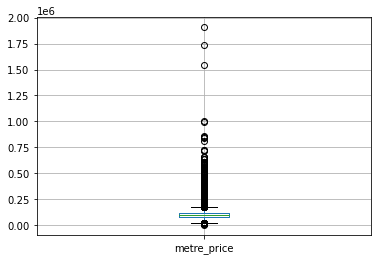

In [134]:
data.boxplot(column='metre_price');

In [135]:
data['metre_price'].describe() 

count      23,565.00
mean       99,405.84
std        50,389.43
min           111.83
25%        76,566.13
50%        95,000.00
75%       114,213.20
max     1,907,500.00
Name: metre_price, dtype: float64

In [136]:
q1 = data['metre_price'].quantile(0.25)
q3 = data['metre_price'].quantile(0.75)
q =  q3 + (q3 - q1)*1.5
print(q)

170683.80698882308


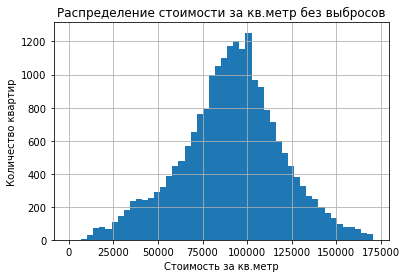

In [137]:
data_filtered = data_filtered.query('metre_price <= @q')
_ = data_filtered['metre_price'].hist(bins=50)
_.set_title('Распределение стоимости за кв.метр без выбросов')
_.set_xlabel('Стоимость за кв.метр')
_.set_ylabel('Количество квартир');

Наиболее распространенная цена за кв.м. от 75 до 103 тыс.руб.

In [796]:
data_filtered.shape

(21125, 29)

Удалим выбросы в общей площади квартир.

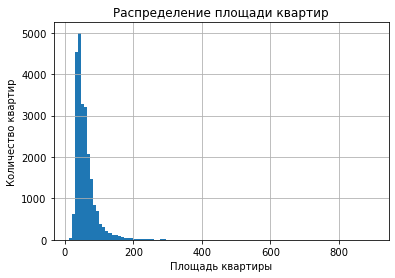

In [138]:
_ = data['total_area'].hist(bins=100)
_.set_title('Распределение площади квартир')
_.set_xlabel('Площадь квартиры')
_.set_ylabel('Количество квартир');

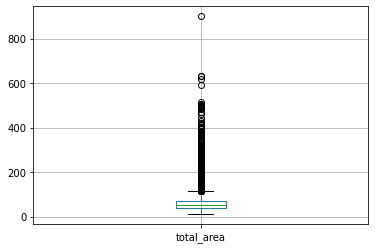

In [139]:
data.boxplot(column='total_area');

In [140]:
data['total_area'].describe() 

count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

In [141]:
q1 = data['total_area'].quantile(0.25)
q3 = data['total_area'].quantile(0.75)
q =  q3 + (q3 - q1)*1.5
print(q)

114.25


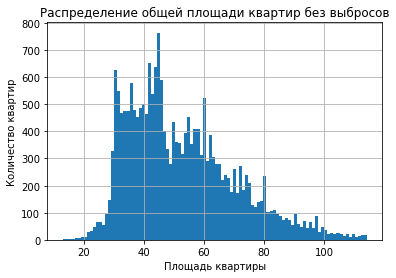

In [142]:
data_filtered = data_filtered.query('total_area <= @q')
_ = data_filtered['total_area'].hist(bins=100)
_.set_title('Распределение общей площади квартир без выбросов')
_.set_xlabel('Площадь квартиры')
_.set_ylabel('Количество квартир');

Самые популярные по площади квартиры от 30 до 50 кв.м. и 60 кв.м.

In [802]:
data_filtered.shape

(21125, 29)

Удалим выбросы по количеству комнат. 

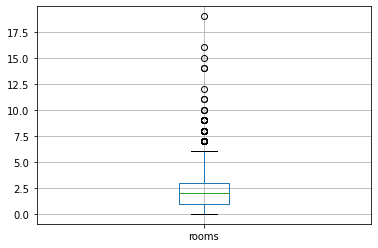

In [143]:
data.boxplot(column='rooms');

Здесь видно по графику, что выбросы - квартиры с больше, чем с 6 комнатами.

In [144]:
data_filtered = data_filtered.query('rooms <= 6')

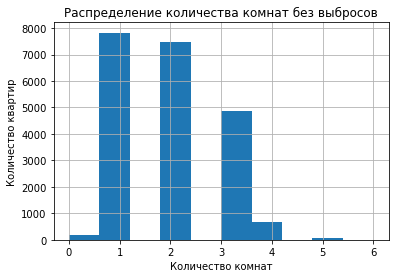

In [155]:
_ = data_filtered['rooms'].hist()
_.set_title('Распределение количества комнат без выбросов')
_.set_xlabel('Количество комнат')
_.set_ylabel('Количество квартир');

Однокомнатные встречаются немного чаще, чем двухкомнатные. 

Теперь уберем выбросы по высоте потолков. 

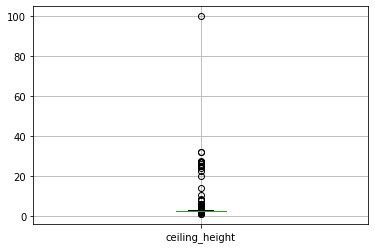

In [146]:
data.boxplot(column='ceiling_height');

In [147]:
data_filtered.shape

(21156, 29)

In [148]:
data['ceiling_height'].describe() 

count   23,565.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

Выбросами будем считать высоту потолков более 4,5м. 

In [149]:
data_filtered = data_filtered.query('ceiling_height <= 4.5')

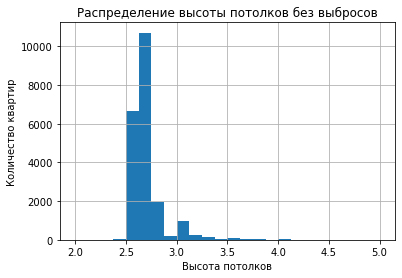

In [150]:
_ = data_filtered['ceiling_height'].hist(bins=24, range=(2, 5))
_.set_title('Распределение высоты потолков без выбросов')
_.set_xlabel('Высота потолков')
_.set_ylabel('Количество квартир');

Мы убрали очень высокие потолки, наиболее часто встречаются потолки с высотой 2.6 - 2.7 м.

In [151]:
data_filtered.shape

(21125, 29)

In [152]:
data_filtered

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_ratio,living_ratio,metre_price,week_day_expo,month_expo,year_expo,flat_floor
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,0.27,0.46,"82,920.79",1,12,2018,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,0.15,0.61,"92,785.71",3,8,2015,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,0.41,0.32,"100,000.00",1,6,2018,другой
5,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,0.30,0.47,"95,065.79",0,9,2018,другой
6,6,"3,700,000.00",37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00,0.39,0.28,"99,195.71",3,11,2017,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,"4,600,000.00",62.40,2016-08-05,3,2.60,9,40.00,8,False,False,False,8.00,0,Петергоф,"45,602.00","34,104.00",1.00,352.00,1.00,675.00,239.00,0.13,0.64,"73,717.95",4,8,2016,другой
23695,14,"3,100,000.00",59.00,2018-01-15,3,2.65,5,38.00,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00,0.14,0.64,"52,542.37",0,1,2018,другой
23696,18,"2,500,000.00",56.70,2018-02-11,2,2.65,3,29.70,1,False,False,False,9.10,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16,0.52,"44,091.71",6,2,2018,первый
23697,13,"11,475,000.00",76.75,2017-03-28,2,3.00,17,46.05,12,False,False,False,23.30,2,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00,0.30,0.60,"149,511.40",1,3,2017,другой


In [153]:
# Процент удаленных выбросов
100 - data_filtered.shape[0] / data.shape[0] *100

10.354339062168478

Мы убрали квартиры со слишком большой стоимостью, площадью, слишком высокими потолками. 
Теперь в полученных данных попробуем определить следующие зависимости: 
* зависит ли цена от площади, числа комнат, удалённости от центра. 

* зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

* зависимость от даты размещения: дня недели, месяца и года.

Для этого будем использовать диаграмму рассеивания.

Строим диаграммы рассеивания зависимости стоимости квадратоного метра от общей площади, числа комнат, удаленности от центра, этажа, даты размещения.

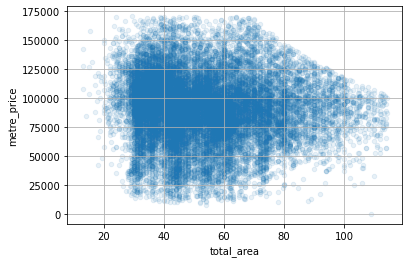

In [156]:
data_filtered.plot(x='total_area', y='metre_price', kind='scatter', alpha=0.1, grid=True);

Можно заметить,что в квартирах площадью 30-40 кв.м. стоимость за 1 кв.м. выше, чем в квартирах большей площади. 

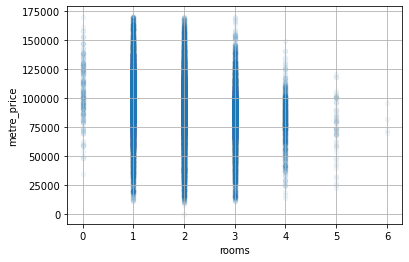

In [157]:
data_filtered.plot(x='rooms', y='metre_price', kind='scatter', alpha=0.05, grid=True);

У однокомнатных квартир стоимость за кв.м.  немного выше, чем в двухкомнатных и значительно выше остальных квартир. 

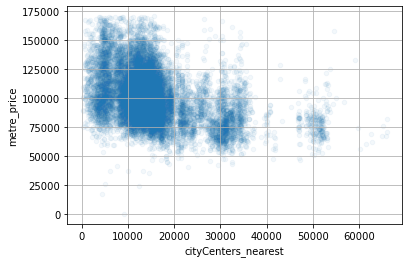

In [159]:
data_filtered.plot(x='cityCenters_nearest', y='metre_price', kind='scatter', alpha=0.05, grid=True);

Квартиры до 20км от центра значительно дороже. 

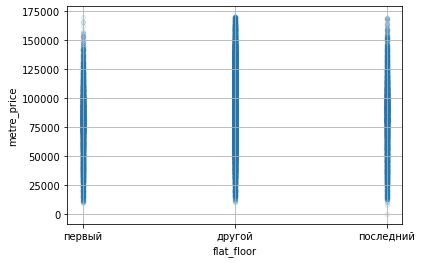

In [160]:
data_filtered.plot(x='flat_floor', y='metre_price', kind='scatter', alpha=0.1, grid=True);

На первом и последнем этажах квартиры дешевле, чем на остальных.

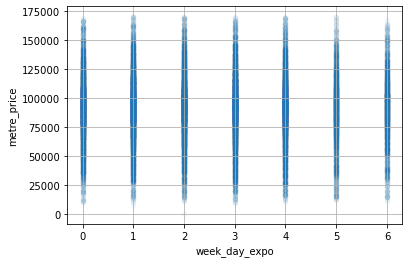

In [161]:
data_filtered.plot(x='week_day_expo', y='metre_price', kind='scatter', alpha=0.05, grid=True);

Нет слишком явной зависимости стоимости от дня недели, но опубликованные в выходные квартиры немного дешевле, чем в будни. 

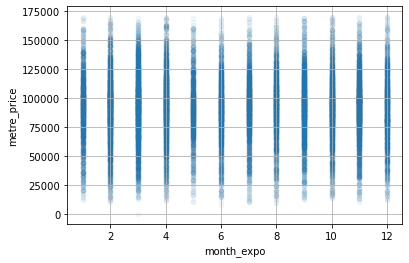

In [162]:
data_filtered.plot(x='month_expo', y='metre_price', kind='scatter', alpha=0.05, grid=True);

Квартиры, опубликованные в феврале, марте и оченью немного дороже остальных. 

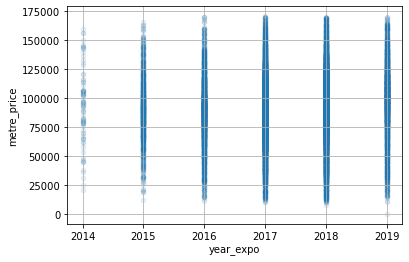

In [163]:
data_filtered.plot(x='year_expo', y='metre_price', kind='scatter', alpha=0.1, grid=True);

Квартиры, выставленные в 2017 и 2018 гг. имеют более широкий диапазон цен, чем в 2015, 2016, 2019.

In [164]:
df_for_corr = data_filtered[['last_price', 'metre_price', 'total_area', 'rooms', 'cityCenters_nearest']].copy()

In [165]:
df_for_corr.corr()

,last_price,metre_price,total_area,rooms,cityCenters_nearest
last_price,1.00,0.63,0.71,0.45,-0.34
metre_price,0.63,1.00,-0.07,-0.22,-0.39
total_area,0.71,-0.07,1.00,0.80,-0.13
rooms,0.45,-0.22,0.80,1.00,-0.08
cityCenters_nearest,-0.34,-0.39,-0.13,-0.08,1.00


Матрица корреляции подтверждает наши предположения о стоимости. 
Зависимость стоимости квадратного метра от удаленности от центра отрицательная - при увеличении расстояния от центра, уменьшается стоимость квадратного метра.
Общая стоимость сильно зависит от общей площади, а вот цена за метр от общей площади почти не зависит, и немного уменьшается при увеличении числа комнат.


Следующее задание: 
* Выберите 10 населённых пунктов с наибольшим числом объявлений. 
* Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
* Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`.

In [166]:
# 10 населённых пунктов с наибольшим числом объявлений.
top_cities = data_filtered['locality_name'].value_counts()[:10]
top_cities 

Санкт-Петербург      13346
посёлок Мурино         518
посёлок Шушары         436
Всеволожск             394
Пушкин                 336
Колпино                335
посёлок Парголово      326
Гатчина                302
деревня Кудрово        298
Выборг                 228
Name: locality_name, dtype: int64

In [167]:
# Создадим отдельный датафрейм с названиями населенных пунктов и средней стоимостью квадратного метра жилья.
top_cities = ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 
              'Всеволожск', 'посёлок Парголово', 'Колпино', 'деревня Кудрово', 'Пушкин', 'Гатчина', 'Выборг']

In [168]:
price = []
for name in top_cities:
      price.append(data_filtered[data_filtered['locality_name'] == name]['metre_price'].mean())
print(price)                                   

[104537.78072906738, 85645.90332306964, 78578.06820437586, 67222.43146236677, 90332.26302280562, 75221.87629490555, 92409.72632167963, 100462.06343484492, 68675.44859988043, 58225.6243571181]


In [169]:
list_tuples = list(zip(top_cities, price)) 
data_prices = pd.DataFrame(data=list_tuples, columns=['city', 'price'])

In [170]:
data_prices

,city,price
0,Санкт-Петербург,"104,537.78"
1,посёлок Мурино,"85,645.90"
2,посёлок Шушары,"78,578.07"
3,Всеволожск,"67,222.43"
4,посёлок Парголово,"90,332.26"
5,Колпино,"75,221.88"
6,деревня Кудрово,"92,409.73"
7,Пушкин,"100,462.06"
8,Гатчина,"68,675.45"
9,Выборг,"58,225.62"


In [171]:
# Населенный пункт с самой дорогой недвижимостью
data_prices[data_prices['price'] == data_prices['price'].max()]

,city,price
0,Санкт-Петербург,"104,537.78"


In [172]:
# Населенный пункт с самой низкой стоимостью жилья
data_prices[data_prices['price'] == data_prices['price'].min()]

,city,price
9,Выборг,"58,225.62"


#### Вывод

Самая высокая стоимость квадратного метра жилья в Санкт-Петербурге. Самая низкая - в Выборге.

### Расчет центральной зоны в Санкт-Петербурге:

Определим центральную зону в Санкт-Петербурге:

* Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
* Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. 
* Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
* После этого посчитайте среднюю цену для каждого километра. 
* Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
* Определите границу, где график сильно меняется, — это и будет центральная зона.

In [173]:
data_spb = data_filtered[data_filtered['locality_name'] == 'Санкт-Петербург']
data_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_ratio,living_ratio,metre_price,week_day_expo,month_expo,year_expo,flat_floor
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,0.15,0.61,"92,785.71",3,8,2015,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,0.41,0.32,"100,000.00",1,6,2018,другой
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24,42.96,22,False,False,False,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN,0.26,0.60,"110,544.69",3,4,2019,другой
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00,0.11,0.71,"88,524.59",6,2,2017,другой
10,5,"5,050,000.00",39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,"38,357.00","13,878.00",1.00,310.00,2.00,553.00,137.00,0.21,0.51,"127,525.25",3,11,2017,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,"9,200,000.00",101.00,2019-04-01,3,3.05,15,63.00,12,False,False,False,15.00,0,Санкт-Петербург,"15,632.00","14,428.00",0.00,NaN,0.00,NaN,23.00,0.15,0.62,"91,089.11",0,4,2019,другой
23689,13,"3,550,000.00",35.30,2018-02-28,1,2.86,15,16.30,4,False,False,False,9.10,2,Санкт-Петербург,"17,284.00","16,081.00",1.00,353.00,2.00,652.00,29.00,0.26,0.46,"100,566.57",2,2,2018,другой
23690,3,"5,500,000.00",52.00,2018-07-19,2,2.65,5,31.00,2,False,False,False,6.00,0,Санкт-Петербург,"20,151.00","6,263.00",1.00,300.00,0.00,NaN,15.00,0.12,0.60,"105,769.23",3,7,2018,другой
23691,11,"9,470,000.00",72.90,2016-10-13,2,2.75,25,40.30,7,False,False,False,10.60,1,Санкт-Петербург,"19,424.00","4,489.00",0.00,NaN,1.00,806.00,519.00,0.15,0.55,"129,903.98",3,10,2016,другой


In [174]:
# Создаем столбец с км до центра
data_spb['cityCenters_km'] = (data_spb['cityCenters_nearest'] / 1000).round(0)

In [175]:
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_ratio,living_ratio,metre_price,week_day_expo,month_expo,year_expo,flat_floor,cityCenters_km
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,0.15,0.61,"92,785.71",3,8,2015,другой,14.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,0.41,0.32,"100,000.00",1,6,2018,другой,8.00
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24,42.96,22,False,False,False,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN,0.26,0.60,"110,544.69",3,4,2019,другой,12.00
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00,0.11,0.71,"88,524.59",6,2,2017,другой,15.00
10,5,"5,050,000.00",39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,"38,357.00","13,878.00",1.00,310.00,2.00,553.00,137.00,0.21,0.51,"127,525.25",3,11,2017,другой,14.00


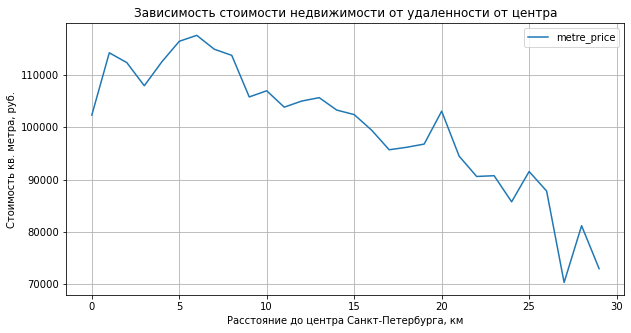

In [179]:
# График стоимости недвижимости в зависимости от удаленности от центра
_ = data_spb.pivot_table(index='cityCenters_km', values='metre_price', aggfunc='mean').sort_values('cityCenters_km').plot(
    grid=True,
    figsize=(10,5)
)
_.set_title('Зависимость стоимости недвижимости от удаленности от центра')
_.set_xlabel('Расстояние до центра Санкт-Петербурга, км')
_.set_ylabel('Стоимость кв. метра, руб.');
    

Центральная зона в радиусе 6 км. 

Следующий шаг:

* Выделите сегмент квартир в центре. 
* Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
* Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
* Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [844]:
data_spb.query('cityCenters_km <= 6').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,week_day_expo,month_expo,year_expo,flat_floor,living_ratio,kitchen_ratio,cityCenters_km
24,8,"6,500,000.00",97.20,2015-10-31,2,2.65,3,46.50,1,False,False,False,19.60,0,Санкт-Петербург,"20,052.00","2,336.00",3.00,411.00,3.00,124.00,265.00,"66,872.43",5,10,2015,первый,0.48,0.20,2.00
61,18,"7,990,000.00",74.00,2017-08-24,2,2.65,4,43.00,4,False,False,False,20.00,0,Санкт-Петербург,"22,568.00","4,288.00",1.00,363.00,0.00,NaN,609.00,"107,972.97",3,8,2017,последний,0.58,0.27,4.00
99,32,"9,600,000.00",90.00,2017-09-26,4,2.65,5,67.00,2,False,False,False,8.00,0,Санкт-Петербург,"23,277.00","2,818.00",0.00,NaN,0.00,NaN,104.00,"106,666.67",1,9,2017,другой,0.74,0.09,3.00
111,4,"4,590,000.00",40.00,2017-05-29,1,2.65,6,18.00,1,False,False,False,10.00,0,Санкт-Петербург,"20,062.00","6,175.00",1.00,241.00,0.00,NaN,31.00,"114,750.00",0,5,2017,первый,0.45,0.25,6.00
136,16,"6,500,000.00",51.80,2018-08-01,2,3.45,6,25.60,2,False,False,False,7.30,1,Санкт-Петербург,"20,502.00","3,618.00",2.00,533.00,1.00,812.00,163.00,"125,482.63",2,8,2018,другой,0.49,0.14,4.00


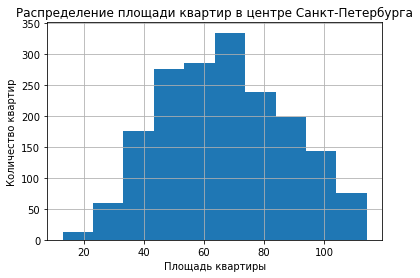

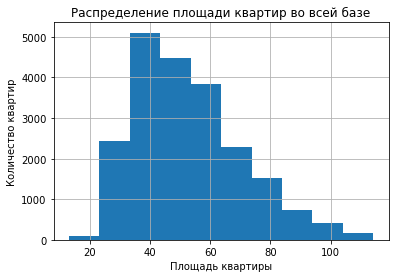

In [184]:
_ = data_spb.query('cityCenters_km <= 6')['total_area'].hist()
_.set_title('Распределение площади квартир в центре Санкт-Петербурга')
_.set_xlabel('Площадь квартиры')
_.set_ylabel('Количество квартир');
plt.show()
   
_ = data_filtered['total_area'].hist()
_.set_title('Распределение площади квартир во всей базе')
_.set_xlabel('Площадь квартиры')
_.set_ylabel('Количество квартир');

Площадь квартир в центре больше, чем по всей базе.

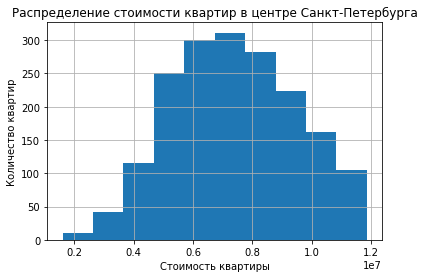

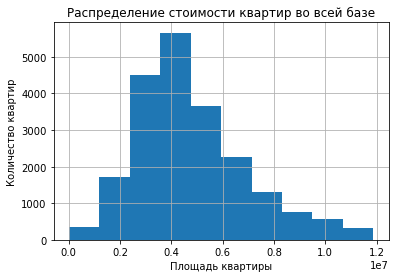

In [186]:
_ = data_spb.query('cityCenters_km <= 6')['last_price'].hist()
_.set_title('Распределение стоимости квартир в центре Санкт-Петербурга')
_.set_xlabel('Стоимость квартиры')
_.set_ylabel('Количество квартир');
plt.show()

_ = data_filtered['last_price'].hist()
_.set_title('Распределение стоимости квартир во всей базе')
_.set_xlabel('Площадь квартиры')
_.set_ylabel('Количество квартир');


Стоимость квартир в центре значительно выше, чем по всей базе.

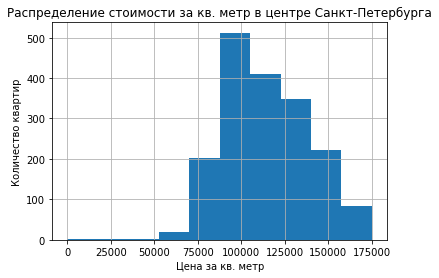

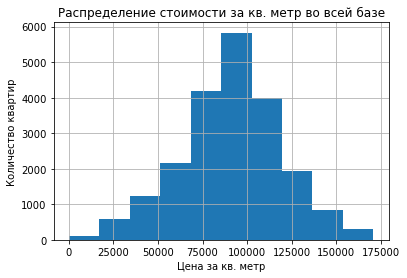

In [189]:
_ = data_spb.query('cityCenters_km <= 6')['metre_price'].hist(range=(0, 175000))
_.set_title('Распределение стоимости за кв. метр в центре Санкт-Петербурга')
_.set_xlabel('Цена за кв. метр')
_.set_ylabel('Количество квартир');
plt.show()

_ =data_filtered['metre_price'].hist()
_.set_title('Распределение стоимости за кв. метр во всей базе')
_.set_xlabel('Цена за кв. метр')
_.set_ylabel('Количество квартир');

Стоимость квадратного метра в центре так же выше, чем по всей базе.

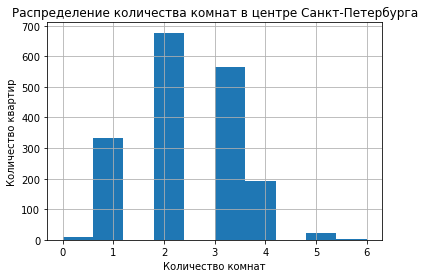

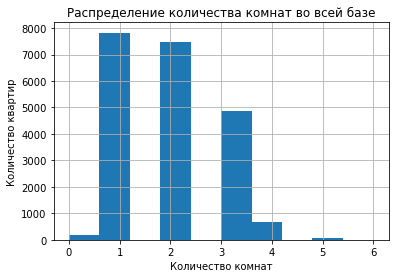

In [190]:
_ = data_spb.query('cityCenters_km <= 6')['rooms'].hist()
_.set_title('Распределение количества комнат в центре Санкт-Петербурга')
_.set_xlabel('Количество комнат')
_.set_ylabel('Количество квартир');
plt.show()

_ = data_filtered['rooms'].hist()
_.set_title('Распределение количества комнат во всей базе')
_.set_xlabel('Количество комнат')
_.set_ylabel('Количество квартир');

В центре двухкомнатных квартир больше, чем остальных. 

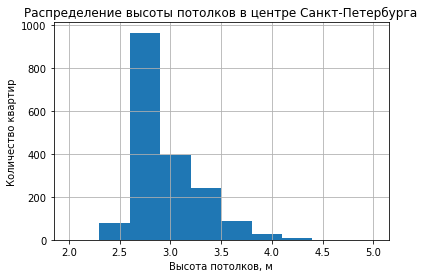

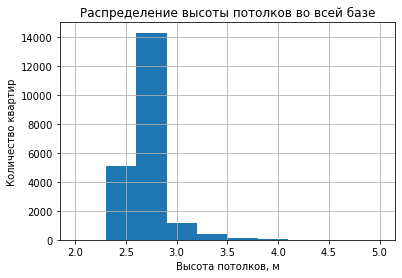

In [192]:
_ =data_spb.query('cityCenters_km <= 6')['ceiling_height'].hist(range=(2,5))
_.set_title('Распределение высоты потолков в центре Санкт-Петербурга')
_.set_xlabel('Высота потолков, м')
_.set_ylabel('Количество квартир');
plt.show()

_ = data_filtered['ceiling_height'].hist(range=(2, 5))
_.set_title('Распределение высоты потолков во всей базе')
_.set_xlabel('Высота потолков, м')
_.set_ylabel('Количество квартир');

Потолки в центре немного выше, чем по всей базе.  

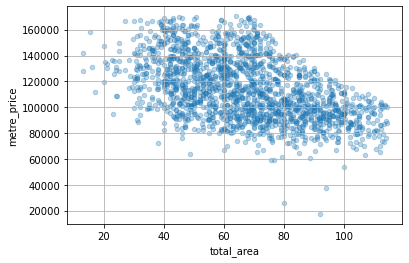

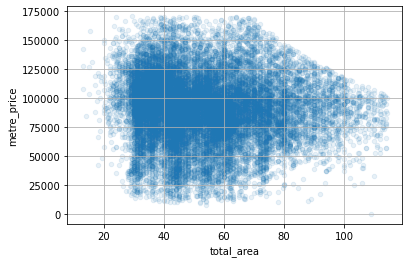

In [193]:
data_spb.query('cityCenters_km <= 6').plot(x='total_area', y='metre_price', kind='scatter', alpha=0.3, grid=True)
plt.show()
data_filtered.plot(x='total_area', y='metre_price', kind='scatter', alpha=0.1, grid=True)
plt.show()


Зависимость стоимости кв.м. от общей площади такая же как по всей базе. 

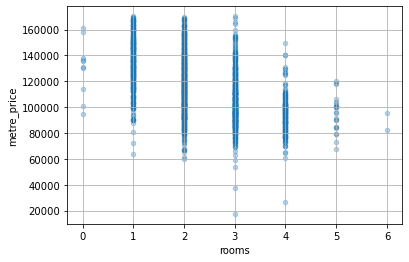

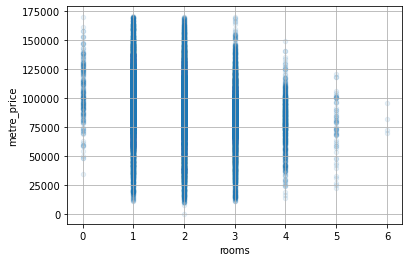

In [194]:
data_spb.query('cityCenters_km <= 6').plot(x='rooms', y='metre_price', kind='scatter', alpha=0.3, grid=True)
plt.show()
data_filtered.plot(x='rooms', y='metre_price', kind='scatter', alpha=0.1, grid=True)
plt.show()

Зависимость стоимость от количества комнат тоже совпадает. 

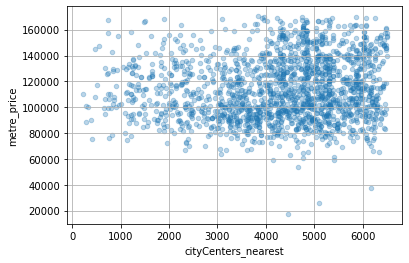

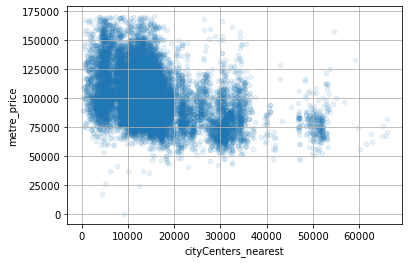

In [195]:
data_spb.query('cityCenters_km <= 6').plot(x='cityCenters_nearest', y='metre_price', kind='scatter', alpha=0.3, grid=True)
plt.show()
data_filtered.plot(x='cityCenters_nearest', y='metre_price', kind='scatter', alpha=0.1, grid=True)
plt.show()

В центре Санкт-Петербурга стоимость практически не меняется в зависимости от расстояния до центра. 

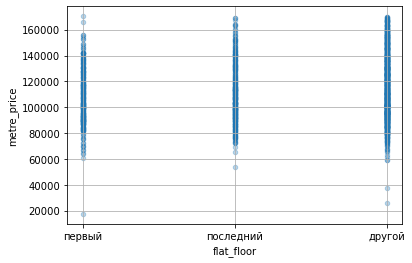

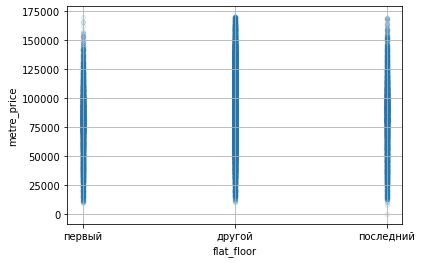

In [196]:
data_spb.query('cityCenters_km <= 6').plot(x='flat_floor', y='metre_price', kind='scatter', alpha=0.3, grid=True)
plt.show()
data_filtered.plot(x='flat_floor', y='metre_price', kind='scatter', alpha=0.1, grid=True)
plt.show()


Здесь зависимость стоимости от этажа совпадает. 

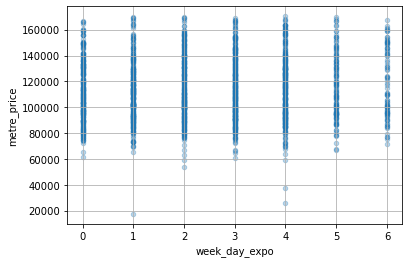

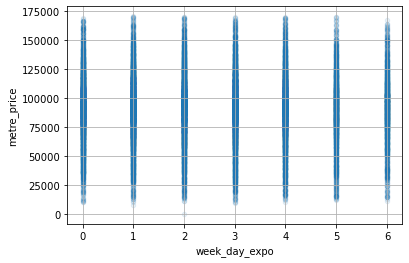

In [197]:
data_spb.query('cityCenters_km <= 6').plot(x='week_day_expo', y='metre_price', kind='scatter', alpha=0.3, grid=True)
plt.show()
data_filtered.plot(x='week_day_expo', y='metre_price', kind='scatter', alpha=0.1, grid=True)
plt.show()

Зависимости от дня недели тоже совпадают: выставленные на выходные квартиры немного дешевле. 

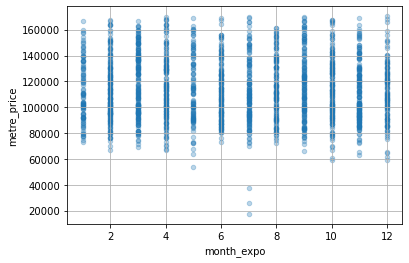

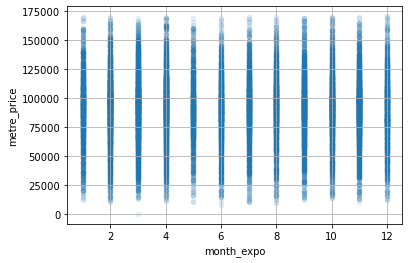

In [198]:
data_spb.query('cityCenters_km <= 6').plot(x='month_expo', y='metre_price', kind='scatter', alpha=0.3, grid=True)
plt.show()
data_filtered.plot(x='month_expo', y='metre_price', kind='scatter', alpha=0.1, grid=True)
plt.show()


По месяцу выставления квартиры зависимости похожи.

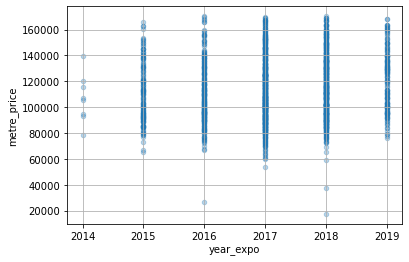

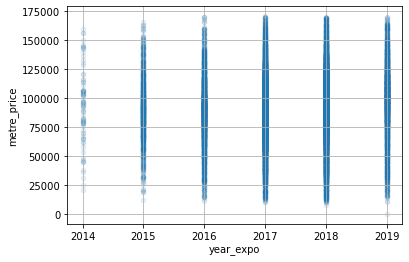

In [199]:
data_spb.query('cityCenters_km <= 6').plot(x='year_expo', y='metre_price', kind='scatter', alpha=0.3, grid=True)
plt.show()
data_filtered.plot(x='year_expo', y='metre_price', kind='scatter', alpha=0.1, grid=True)
plt.show()


По годам в центре Санкт-Петербурга наиболее широкий разброс цен в 2017 и 2018 году, как и по всей базе. 

In [200]:
df_center_for_corr = data_spb[['last_price', 'metre_price', 'total_area', 'rooms', 'cityCenters_nearest']].copy()

In [201]:
df_center_for_corr.corr()

,last_price,metre_price,total_area,rooms,cityCenters_nearest
last_price,1.00,0.39,0.81,0.52,-0.34
metre_price,0.39,1.00,-0.19,-0.37,-0.27
total_area,0.81,-0.19,1.00,0.79,-0.21
rooms,0.52,-0.37,0.79,1.00,-0.16
cityCenters_nearest,-0.34,-0.27,-0.21,-0.16,1.00


In [202]:
df_for_corr.corr()

,last_price,metre_price,total_area,rooms,cityCenters_nearest
last_price,1.00,0.63,0.71,0.45,-0.34
metre_price,0.63,1.00,-0.07,-0.22,-0.39
total_area,0.71,-0.07,1.00,0.80,-0.13
rooms,0.45,-0.22,0.80,1.00,-0.08
cityCenters_nearest,-0.34,-0.39,-0.13,-0.08,1.00


Если сравнивать корреляции по центру Санкт-Петербурга и все остальные объекты недвижимости: 

* расстояние от центра в центре Спб меньше влияет на стоимость кв. метра, чем в остальных населенных пунктах; 

* стоимость кв. метра в центре Спб немного уменьшается при увеличении общей площади;

* в центре Спб общая стоимость больше зависит от общей площади, и меньше от стоимости за кв.м., чем по всей остальной базе.

Похоже, в нашу автоматизированную систему определения рыночной стоимости объектов недвижимости стоит добавить признак центр/не центр.

### Вывод

Мы провели исследовательский анализ данных, изучили как стоимость недвижимости зависит  от площади, числа комнат, удалённости от центра, от того, на каком этаже расположена квартира:

* Наиболее высокая стоимость за кв.м. у квартир площадью с меньшей общей площадью.
* Самые дорогие по цене за кв.м. - однокомнатные квартиры.
* Ближе к центру квартиры дороже.
* На первом и последнем этажах квартиры дешевле.
* Чаще всего продаются однокомнатные квартиры, чуть реже двухкомнатные. Трехкомнатные значительно реже. 


* Квартиры, которые выставлялись на продажу на выходные в целом немного дешевле, чем выставленные в будни.
* В 2017 и 2018 было больше как более дешевых, так и более дорогих квартир, чем в другие годы. 


* Самые дорогие квартиры в Санкт-Петербурге.
* Из популярных городов наиболее дешевые квартиры в Выборге. 


* В центре Санкт-Петербурга (радиус 6 км) выше стоимость квартир, стоимость квадратного метра, более распространены двухкомнатыне квартиры, реже трехкомнатные, еще реже однокомнатные.
* Стоимость квартир в зависимости от расстояния до центра в центре Санкт-Петербурга не меняется. 
* Стоимость квартир в центре Санкт-Петербурга в зависимости от даты выставления на продажу так же меняется, как и по всей базе. 



## Общий вывод

1. Основные параметры, которые влияют на стоимость квартиры: расстояние от центра, количество комнат и площадь. В исследовании мы выясняли зависимости стоимости квартир от этих показателей для центра Санкт-Петербурга, а так же для остального Санкт-Петербурга и Ленинградской области. 


2. При обработке данных мы отбросили выбивающиеся значения со слишком высокой стоимостью квартир, слишком большой площадью, большим числом комнат и потолками свыше 4.5м. Удаление выбросов уменьшило исходные данные на 10%. Так же пропуски по жилой площади заменили средним соотношением к общей площади, а пропуски в площади кухни - медианой. 


3. Для повышения качества данных следует добавить информацию по расстоянию до ближайшей станции метро, ж/д станции и других важных транспортных узлов. 